In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Most basic Model: Sphere with uniform density and linear energy loss

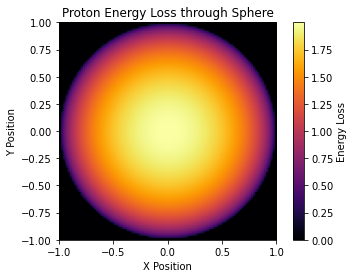

In [18]:
def compute_path_length(x, y, sphere_radius):
    """Compute the path length of a proton traveling along z through a sphere centered at (0,0,0)."""
    r = np.sqrt(x**2 + y**2)

    # Proton misses the sphere
    if r >= sphere_radius:
        return 0 
    
    # Solve for entry and exit points along z
    z_max = np.sqrt(sphere_radius**2 - r**2)
    return 2 * z_max  # Full path length inside the sphere

# Simulation parameters
image_size = 100  # 100x100 grid
sphere_radius = 1.0  # Assume radius of 1 unit
energy_loss_per_unit = 1.0  # Arbitrary scaling factor

grid_x = np.linspace(-sphere_radius, sphere_radius, image_size)
grid_y = np.linspace(-sphere_radius, sphere_radius, image_size)
energy_loss = np.zeros((image_size, image_size))

# Compute energy loss map
for i, x in enumerate(grid_x):
    for j, y in enumerate(grid_y):
        path_length = compute_path_length(x, y, sphere_radius)
        energy_loss[j, i] = path_length * energy_loss_per_unit

# Plot the energy loss image
plt.imshow(energy_loss, extent=[-sphere_radius, sphere_radius, -sphere_radius, sphere_radius], cmap='inferno')
plt.colorbar(label='Energy Loss')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Proton Energy Loss through Sphere')
plt.show()


# Intermediate Model: Non-uniform density and simplified Bethe-Bloch formula

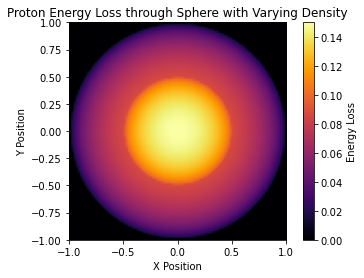

In [ ]:
def bethe_energy_loss(E, density, path_length):
    """Approximate energy loss using a simplified Bethe-Bloch formula."""
    k = 0.5  # Arbitrary constant for scaling (depends on material properties)
    return k * density * path_length / E  # Simplified proportional formula

def compute_path_length(x, y, sphere_radius, inner_sphere_radius):
    """Compute the path length of a proton traveling along z through a sphere with varying density."""
    r = np.sqrt(x**2 + y**2)
    if r >= sphere_radius:
        return 0, 0  # Proton misses the sphere
    
    z_max = np.sqrt(sphere_radius**2 - r**2)
    z_inner = np.sqrt(inner_sphere_radius**2 - r**2) if r < inner_sphere_radius else 0
    
    return 2 * z_inner, 2 * (z_max - z_inner)  # Path length in inner and outer regions

# Simulation parameters
image_size = 100  # 100x100 grid
sphere_radius = 1.0  # Outer sphere radius
inner_sphere_radius = 0.5  # Inner sphere with different density
outer_density = 1.0
inner_density = 2.0
initial_energy = 10.0

grid_x = np.linspace(-sphere_radius, sphere_radius, image_size)
grid_y = np.linspace(-sphere_radius, sphere_radius, image_size)
energy_loss = np.zeros((image_size, image_size))

# Compute energy loss map
for i, x in enumerate(grid_x):
    for j, y in enumerate(grid_y):
        path_inner, path_outer = compute_path_length(x, y, sphere_radius, inner_sphere_radius)
        loss_inner = bethe_energy_loss(initial_energy, inner_density, path_inner)
        loss_outer = bethe_energy_loss(initial_energy, outer_density, path_outer)
        energy_loss[j, i] = loss_inner + loss_outer

# Plot the energy loss image
plt.imshow(energy_loss, extent=[-sphere_radius, sphere_radius, -sphere_radius, sphere_radius], cmap='inferno')
plt.colorbar(label='Energy Loss')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Proton Energy Loss through Sphere with Varying Density')
plt.show()


# Final Model: Less simplified Bethe-Bloch formula and simulating the presence of eyes in the skull

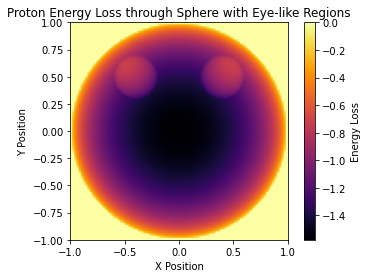

In [ ]:
def bethe_energy_loss(E, Z, A, density, path_length):
    """Compute energy loss using a more detailed Bethe-Bloch formula approximation."""
    K = 0.307  # MeV cm²/g (constant in Bethe formula)
    I = 10 * Z  # Mean excitation potential (approximation in eV)
    beta = np.sqrt(1 - (0.511 / E)**2)  # Beta from relativistic energy
    term1 = (K * Z * density / (A * beta**2)) * path_length
    term2 = np.log(2 * 0.511 * beta**2 / I) - beta**2
    return term1 * term2

def compute_path_length(x, y, sphere_radius, eye_radius, eye_offset):
    """Compute the path length of a proton traveling along z through a sphere with two eye-like regions."""
    r = np.sqrt(x**2 + y**2)
    if r >= sphere_radius:
        return 0, 0, 0  # Proton misses the sphere
    
    z_max = np.sqrt(sphere_radius**2 - r**2)
    
    # Check if the point is inside one of the two eye spheres
    eye1_center = (-eye_offset, -sphere_radius * 0.5)
    eye2_center = (eye_offset, -sphere_radius * 0.5)
    
    r1 = np.sqrt((x - eye1_center[0])**2 + (y - eye1_center[1])**2)
    r2 = np.sqrt((x - eye2_center[0])**2 + (y - eye2_center[1])**2)
    
    path_eye1 = 2 * np.sqrt(eye_radius**2 - r1**2) if r1 < eye_radius else 0
    path_eye2 = 2 * np.sqrt(eye_radius**2 - r2**2) if r2 < eye_radius else 0
    
    return path_eye1, path_eye2, 2 * (z_max - max(path_eye1, path_eye2))

# Simulation parameters
image_size = 100  # 100x100 grid
sphere_radius = 1.0  # Outer sphere radius
eye_radius = 0.2  # Small spheres (eyes)
eye_offset = 0.4  # Offset of the eyes from the center
Z_main, A_main, density_main = 15.86, 56, 1.5  # Main sphere properties (e.g., bone)
Z_eye, A_eye, density_eye = 7.42, 18, 1.0  # Eye regions (e.g., water)
initial_energy = 50.0  # Proton initial energy in MeV
grid_x = np.linspace(-sphere_radius, sphere_radius, image_size)
grid_y = np.linspace(-sphere_radius, sphere_radius, image_size)
energy_loss = np.zeros((image_size, image_size))

# Compute energy loss map
for i, x in enumerate(grid_x):
    for j, y in enumerate(grid_y):
        path_eye1, path_eye2, path_outer = compute_path_length(x, y, sphere_radius, eye_radius, eye_offset)
        loss_eye1 = bethe_energy_loss(initial_energy, Z_eye, A_eye, density_eye, path_eye1)
        loss_eye2 = bethe_energy_loss(initial_energy, Z_eye, A_eye, density_eye, path_eye2)
        loss_outer = bethe_energy_loss(initial_energy, Z_main, A_main, density_main, path_outer)
        energy_loss[j, i] = loss_eye1 + loss_eye2 + loss_outer

# Plot the energy loss image
plt.imshow(energy_loss, extent=[-sphere_radius, sphere_radius, -sphere_radius, sphere_radius], cmap='inferno')
plt.colorbar(label='Energy Loss')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Proton Energy Loss through Sphere with Eye-like Regions')
plt.show()
